In [17]:
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy as np 
import pandas as pd 
import seaborn as sns
from numpy import floor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier


import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("C:\\Users\\Manish\\kc_house_data (1).csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
df.shape

(21613, 21)

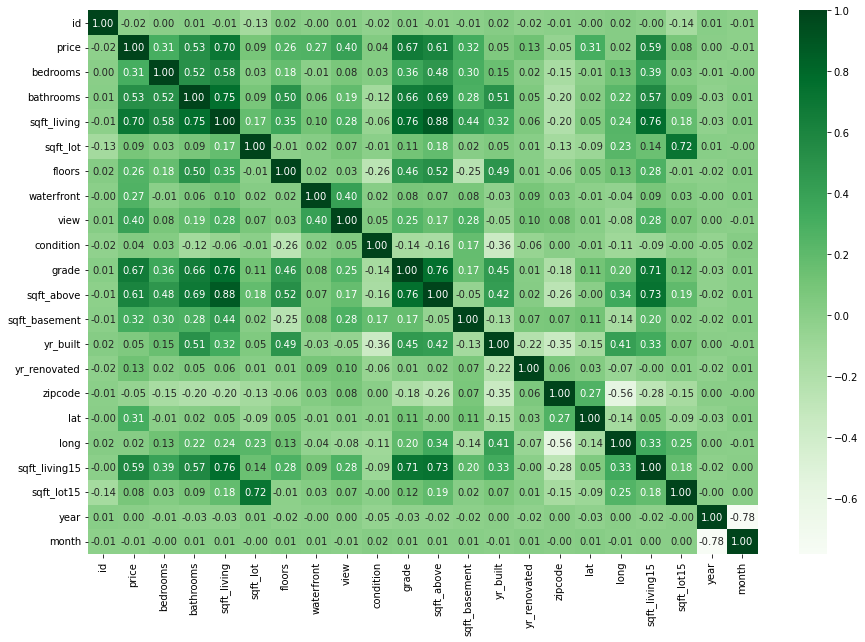

In [51]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens',fmt='.2f')
plt.show()

In [21]:
df['year']=df['date']
df['month']=df['date']

for i in range (len(df.date)):
    df['year'][i]=df['date'][i][:4]
    df['month'][i]=df['date'][i][4:6]
    
df['year']=df['year'].astype('int')
df['month']=df['month'].astype('int')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [23]:
df1 = df.drop(['id','date', 'long', 'sqft_living15', 'sqft_lot15', 'lat', 'yr_renovated'], axis=1)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,2015,1


# Task 1

In [24]:
from sklearn.model_selection import train_test_split
X = df1.iloc[:,1:]
y = df1.iloc[:,0:1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=2)

# Task 2

In [25]:
reg=LinearRegression()
reg.fit(X_train,y_train)

pred=reg.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,pred)
print("r2 socre is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared Error :",mean_squared_error(y_test,pred))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,pred)))

r2 socre is  0.6930473653797771
Mean Absolute Error : 138922.546261256
Mean Squared Error : 44853564804.32094
Mean Squared Root Error : 211786.60204158557


# Task 3

In [29]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


rfr= RandomForestRegressor()
rfr = rfr.fit(X_train, y_train)
pred= rfr.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
print("r2 socre is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared Error :",mean_squared_error(y_test,pred))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,pred)))

r2 socre is  0.8565818455000722
Mean Absolute Error : 82265.76792668825
Mean Squared Error : 20957029721.988285
Mean Squared Root Error : 144765.42999621245


# Task 4

In [32]:
from sklearn.ensemble import AdaBoostRegressor

rfa = AdaBoostRegressor()
rfa = rfa.fit(X_train,y_train)
pred_ada = rfa.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred_ada)
print("r2 socre is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_ada))
print("Mean Squared Error :",mean_squared_error(y_test,pred_ada))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,pred_ada)))

r2 socre is  0.3453681875854584
Mean Absolute Error : 260834.46629555957
Mean Squared Error : 95658310466.80716
Mean Squared Root Error : 309286.777064276


# Task 5

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

In [41]:
a =  DecisionTreeRegressor()
b =  KNeighborsRegressor()
c  =  LinearRegression() 

In [42]:
level0=[('knn', b),('cart',a)]
model = StackingRegressor(estimators=level0, final_estimator=LinearRegression())
model.fit(X_train,y_train)

StackingRegressor(estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor())],
                  final_estimator=LinearRegression())

In [43]:
ypred = model.predict(X_test)
score=r2_score(y_test,ypred)
print("r2 socre is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,ypred))
print("Mean Squared Error :",mean_squared_error(y_test,ypred))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,ypred)))

r2 socre is  0.7719582237553297
Mean Absolute Error : 109013.01374476636
Mean Squared Error : 33322687070.394302
Mean Squared Root Error : 182545.02751484167


# Task 6

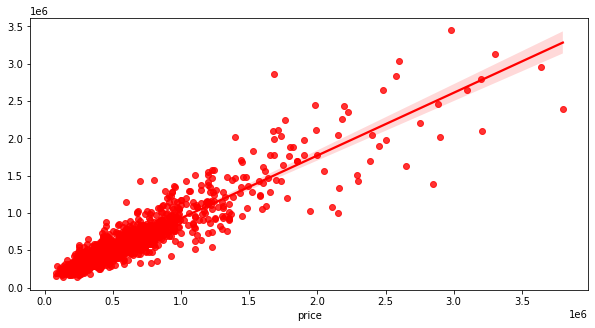

In [46]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(1,6485)
plt.figure(figsize=(10,5))
sns.regplot(y_test,pred,color='red')
plt.show()